# setting

In [1]:
import sys, os
home_path = os.path.expanduser("~")
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/models/')
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/')
sys.path.append(home_path + '/.pyenv/versions/3.6.5/lib/python3.6/site-packages/xgboost-0.81-py3.6.egg')

# module

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import feather # fast reading data
from datetime import datetime
from sklearn.metrics import mean_squared_error
import requests, time
import base
import Regressor, Ensemble
import GradientBoosting as gb
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
%matplotlib inline

In [3]:
import importlib
importlib.reload(base)
importlib.reload(Regressor)
importlib.reload(Ensemble)
importlib.reload(gb)

<module 'GradientBoosting' from '/Users/takutokotsubo/Desktop/Elo_kaggle/py/models/GradientBoosting.py'>

# Read data

In [4]:
# read file
# train_name = "train_sample"; test_name = "test_sample"; features_name = "features_sample"; # test code
train_name = "train_20190112"; test_name = "test_20190112"; features_name = "features_20190112";
train, test, features, target = base.read_data(train_name,test_name,features_name,home_path)

201917 observations and 1687 features in train set.
123623 observations and 1685 features in test set.
1683 observations and 1 features in features set.


# Regession model

In [52]:
# Ridge regression
# clf = Ridge(alpha=100)
# val_pred_ridge, test_pred_ridge = Regressor.Regressors(clf,train,test,features,target) 

# Ensemble regression (bagging)
# clf = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
# val_pred_bag, test_pred_bag = Regressor.Regressors(clf,train,test,features,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [32]:
# Lasso regression
clf = Lasso(alpha=100)
with base.timer("Lasso Regression"):
    val_pred_lasso, test_pred_lasso = Regressor.Regressors(clf,train,test,features,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [53]:
# print validation RMSE 
print("Ridge regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ridge)))
print("Lasso regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lasso)))
print("Bagging regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_bag)))  

Ridge regression validation RMSE: 4.4739
Lasso regression validation RMSE: 3.8264
Bagging regression validation RMSE: 3.8392


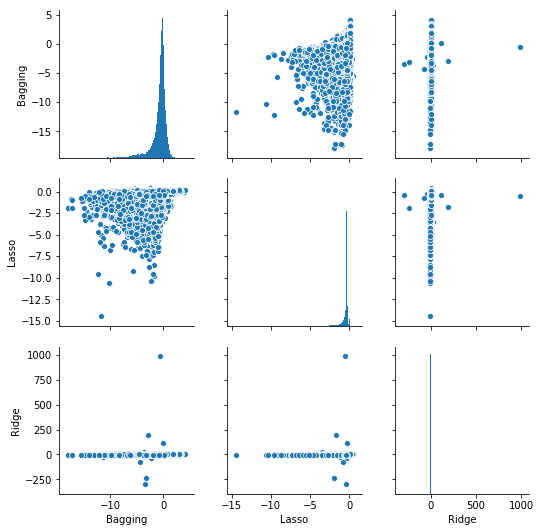

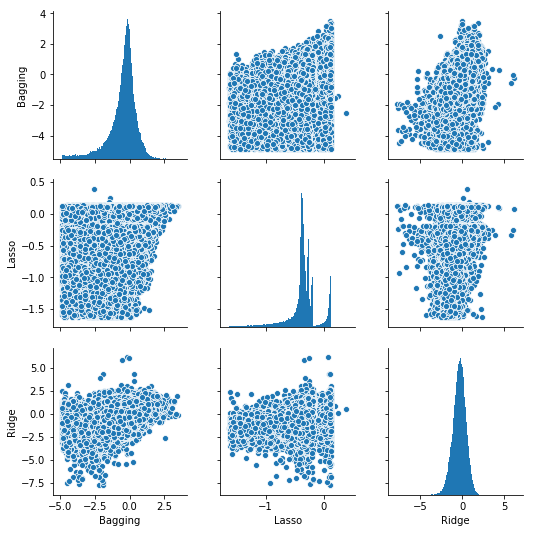

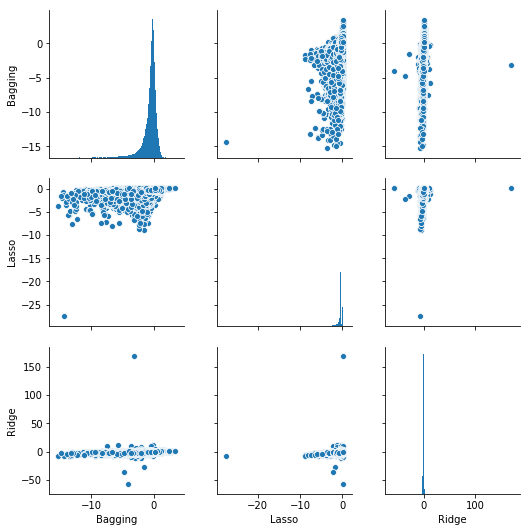

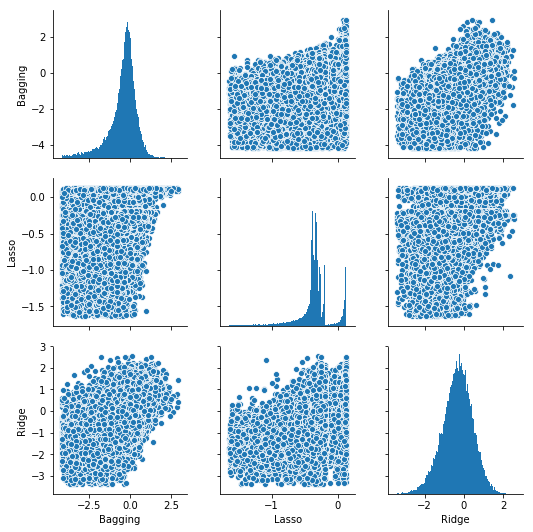

In [54]:
# set data frame
df_val = pd.DataFrame({'Ridge':val_pred_ridge, 'Lasso':val_pred_lasso, "Bagging" : val_pred_bag})
df_test = pd.DataFrame({'Ridge':test_pred_ridge, 'Lasso':test_pred_lasso, "Bagging" : test_pred_bag})
# plot validation data set 
sns.pairplot(df_val,diag_kws={'bins': 500}) # all values
sns.pairplot(df_val[df_val.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers
# plot test data set 
sns.pairplot(df_test,diag_kws={'bins': 500}) # all values
sns.pairplot(df_test[df_test.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],
             diag_kws={'bins': 500}) # non outliers

In [55]:
# submit file
base.submit(test_pred_ridge,home_path=home_path,tech="Ridge")
base.submit(test_pred_lasso,home_path=home_path,tech="Lasso")
base.submit(test_pred_bag,home_path=home_path,tech="Bagging")

In [56]:
base.line("finished Regression calculation")

# Gradient Boosting method

- LightGBM
   - execute model: モデルを実行する
   - visualization model importance: 特徴量の重要度を可視化する
   - using best features: 任意の特徴量を用いて, 性能がどのように変化するか

## Light GBM

### Execute model

In [5]:
# parameters
param_lgb1 = base.open_parameter(file_name = 'kernel_param_tuning_lgb', home_path = home_path)
param_lgb2 = base.open_parameter(file_name = 'kernel_param_lgb', home_path = home_path)

In [ ]:
# model
with base.timer("Light GBM"):
    val_pred_lgb, test_pred_lgb, lgb_importance_df = gb.Regressors(gb.Lightgbm_Regressor,param_lgb1,train,test,features,target,folds=5)

fold n°1


In [ ]:
# result
print("LIghtgbm validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "Lightgbm_feature_1683_param1")

###  Visualization

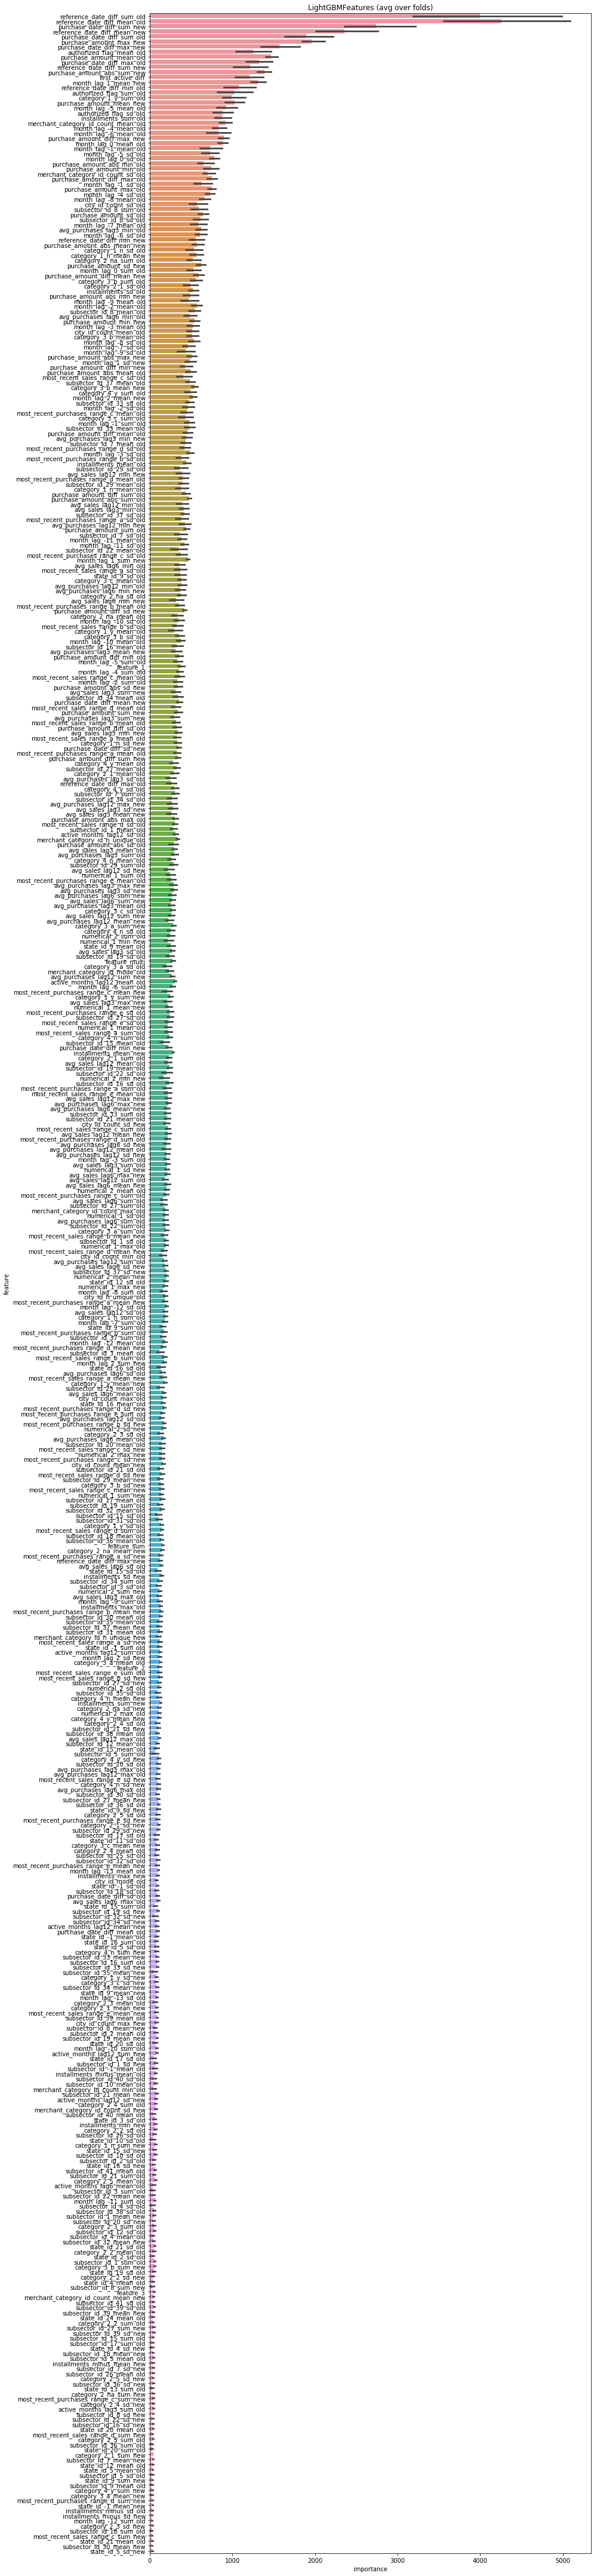

In [28]:
base.display_importances(lgb_importance_df,title="LightGBM",home_path=home_path,file_name = None)

## Extract best features

In [44]:
best_features = base.extract_best_features(lgb_importance_df,num=500)
# model
with base.timer("Light GBM"):
    val_pred_lgb, test_pred_lgb, lgb_importance_df = gb.Regressors(gb.Lightgbm_Regressor,param_lgb1,train,test,best_features,target,folds=5)

fold n°1
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.71777	valid_1's rmse: 3.75069
[200]	training's rmse: 3.64321	valid_1's rmse: 3.70701
[300]	training's rmse: 3.59493	valid_1's rmse: 3.68657
[400]	training's rmse: 3.56004	valid_1's rmse: 3.67594
[500]	training's rmse: 3.53241	valid_1's rmse: 3.66974
[600]	training's rmse: 3.50954	valid_1's rmse: 3.66555
[700]	training's rmse: 3.49034	valid_1's rmse: 3.66289
[800]	training's rmse: 3.47384	valid_1's rmse: 3.66082
[900]	training's rmse: 3.46054	valid_1's rmse: 3.65945
[1000]	training's rmse: 3.44644	valid_1's rmse: 3.65834
[1100]	training's rmse: 3.4344	valid_1's rmse: 3.65762
[1200]	training's rmse: 3.42296	valid_1's rmse: 3.6572
[1300]	training's rmse: 3.41203	valid_1's rmse: 3.6567
[1400]	training's rmse: 3.40114	valid_1's rmse: 3.65613
[1500]	training's rmse: 3.3907	valid_1's rmse: 3.65573
[1600]	training's rmse: 3.38027	valid_1's rmse: 3.65539
[1700]	training's rmse: 3.36963	valid_1's rms

In [46]:
# result
print("LIghtgbm validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "Lightgbm_best_feature_param1")

LIghtgbm validation RMSE: 3.6560


## Xgboost

In [7]:
# parameters
param_xgb1 = base.open_parameter(file_name = 'kernel_param_xgb', home_path = home_path)

In [ ]:
# model
with base.timer("Xgboost"):
    val_pred_xgb, test_pred_xgb, xgb_importance_df = gb.Regressors(gb.Xgboost_Regressor,param_xgb1,train,test,features,target,folds=5)

fold n°1
[0]	train-rmse:3.94772	valid-rmse:3.95092
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:3.56059	valid-rmse:3.79812
[200]	train-rmse:3.31366	valid-rmse:3.73311
[300]	train-rmse:3.14668	valid-rmse:3.70365
[400]	train-rmse:3.02128	valid-rmse:3.69066
[500]	train-rmse:2.92815	valid-rmse:3.68465
[600]	train-rmse:2.85235	valid-rmse:3.6807


In [1]:
# result
print("Xgboost validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_xgb)))
# submit
base.submit(test_pred_lgb,home_path=home_path,tech = "xgboost_feature_1037_param1")

NameError: name 'np' is not defined

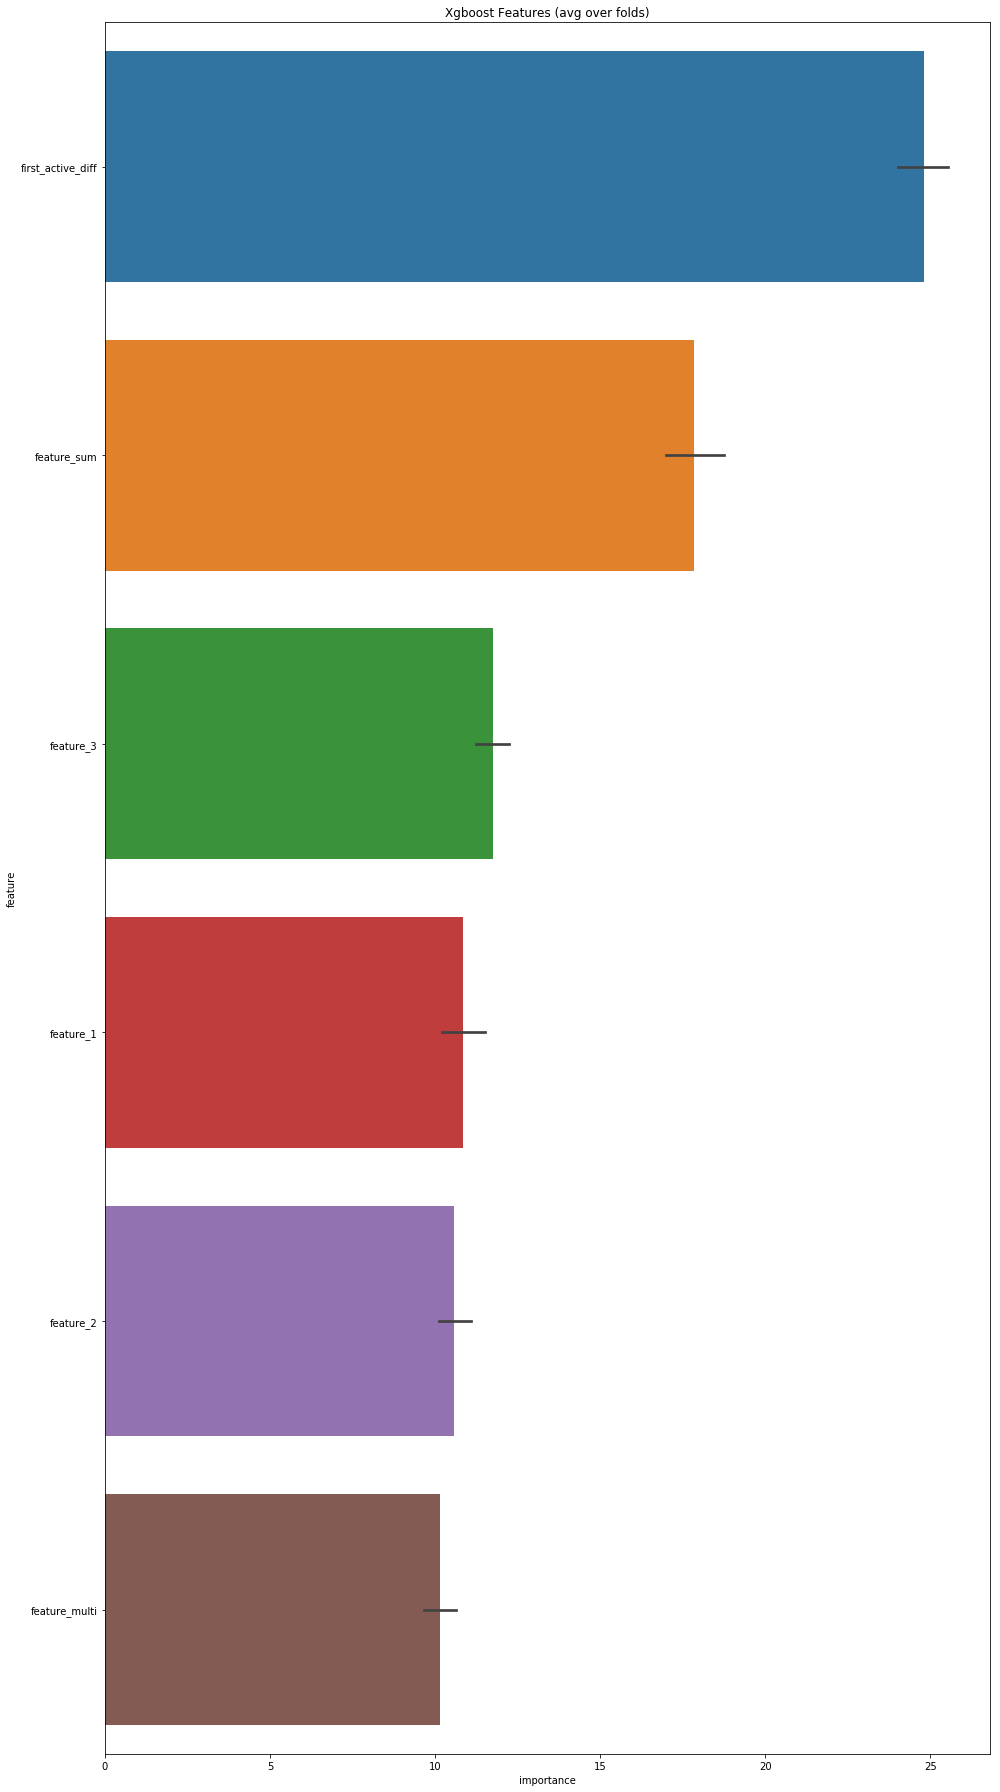

In [47]:
base.display_importances(xgb_importance_df,title="Xgboost",home_path=home_path,file_name = None)

# Ensemble

Ensemble.pyは作業が進み次第記入する.

In [57]:
# data set 
train_stack = np.vstack([val_pred_lasso,val_pred_bag,val_pred_lgb, val_pred_xgb]).transpose()
test_stack = np.vstack([test_pred_lasso,test_pred_bag,test_pred_lgb, test_pred_xgb]).transpose()

In [58]:
# Ridge regression
clf = Ridge(alpha=100)
val_pred_ensemble, test_pred_ensemble = Ensemble.Ensembles(clf,train_stack,test_stack,train,target) 

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [60]:
# result
print("Ensemble validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ensemble)))
# submit
base.submit(test_pred_ensemble,home_path=home_path,tech="lasso-bagging-lgb-xgb-stack")

Ensemble validation RMSE: 3.6567
